In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv('../etl/cadastros/201603_Servidores/out_20160331_Cadastro.csv', sep='\t', encoding='ISO-8859-1')
df = df[df['ORG_LOTACAO'] == 'UNIVERSIDADE FEDERAL DO CEARA']

C:\Users\abevieira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (10,12,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df = df[['Id_SERVIDOR_PORTAL', 'NOME']]

In [34]:
cv = CountVectorizer(ngram_range=(2, 2))

df_ = cv.fit_transform(df['NOME'])

df_.shape

(7520, 13389)

In [35]:
df_.toarray()[:1]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
full = pd.concat([df, pd.DataFrame(df_.toarray(), columns=cv.get_feature_names(), index=df.index)], axis=1)

In [71]:
s = full.sum()

In [73]:
s = s.drop(s.index[:2])

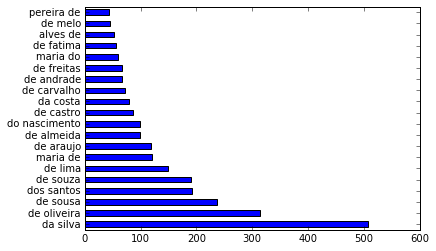

In [85]:
s.sort_values(ascending=False)[:20].plot(kind='barh')